<a href="https://colab.research.google.com/github/Nandi-123/RCode-Earthquake/blob/main/Normal_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [4]:
beml_df=pd.read_csv("/content/BEML.csv")

In [7]:
beml_df[0:5]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [9]:
glaxo_df=pd.read_csv("/content/GLAXO.csv")

In [10]:
glaxo_df=glaxo_df.set_index(pd.DatetimeIndex(glaxo_df['Date']))

In [11]:
glaxo_df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2010-01-04,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
2010-01-05,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2010-01-06,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
2010-01-07,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
2010-01-08,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11
...,...,...,...,...,...,...,...,...
2016-12-26,2016-12-26,2703.00,2740.00,2677.00,2715.0,2723.50,3953.0,107.15
2016-12-27,2016-12-27,2722.95,2725.00,2683.00,2692.0,2701.75,10600.0,286.10
2016-12-28,2016-12-28,2701.75,2718.00,2690.00,2698.0,2702.15,6050.0,163.44


In [12]:
beml_df=beml_df.set_index(pd.DatetimeIndex(beml_df["Date"]))

In [13]:
beml_df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2010-01-04,2010-01-04,1121.00,1151.00,1121.00,1134.00,1135.60,101651.0,1157.18
2010-01-05,2010-01-05,1146.80,1149.00,1128.75,1135.00,1134.60,59504.0,676.47
2010-01-06,2010-01-06,1140.00,1164.25,1130.05,1137.00,1139.60,128908.0,1482.84
2010-01-07,2010-01-07,1142.00,1159.40,1119.20,1141.00,1144.15,117871.0,1352.98
2010-01-08,2010-01-08,1156.00,1172.00,1140.00,1141.20,1144.05,170063.0,1971.42
...,...,...,...,...,...,...,...,...
2016-12-26,2016-12-26,965.00,965.05,935.00,950.10,950.25,398696.0,3783.63
2016-12-27,2016-12-27,960.70,989.00,952.35,974.00,975.70,808561.0,7885.14
2016-12-28,2016-12-28,980.75,985.00,970.15,977.00,974.40,367041.0,3592.49


Text(0, 0.5, 'Close Price')

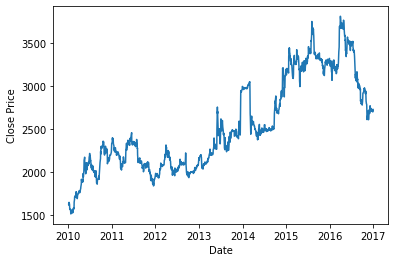

In [14]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
plt.plot(glaxo_df.Close);
plt.xlabel('Date');
plt.ylabel('Close Price')

Text(0, 0.5, 'Close')

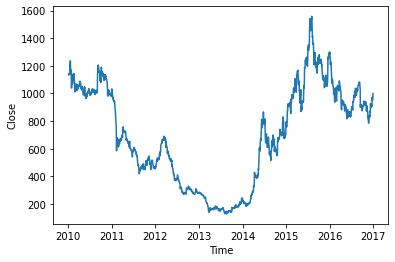

In [15]:
plt.plot(beml_df.Close)
plt.xlabel('Time')
plt.ylabel('Close')

In [16]:
glaxo_df['gain']=glaxo_df.Close.pct_change()
beml_df['gain']=beml_df.Close.pct_change()

In [17]:
glaxo_df=glaxo_df.dropna()
beml_df=beml_df.dropna()

Text(0, 0.5, 'gain')

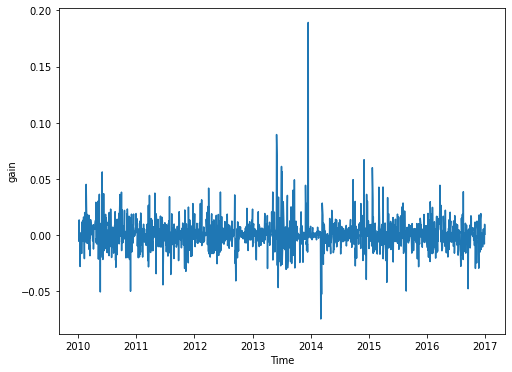

In [20]:
plt.figure(figsize=(8,6))
plt.plot(glaxo_df.index,glaxo_df.gain)
plt.xlabel('Time')
plt.ylabel('gain')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


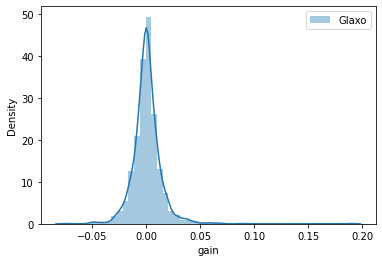

In [22]:
sn.distplot(glaxo_df.gain,label='Glaxo')
plt.xlabel('gain')
plt.ylabel('Density')
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


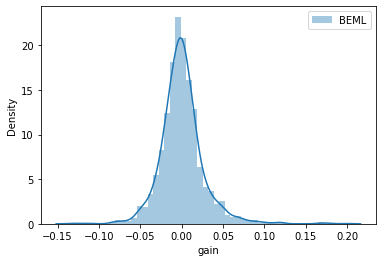

In [23]:
sn.distplot(beml_df.gain,label='BEML')
plt.xlabel('gain')
plt.ylabel('Density')
plt.legend()

In [24]:
print('Mean', round(glaxo_df.gain.mean(),4))
print('Standard Deviation:',round(beml_df.gain.std(),4))

Mean 0.0004
Standard Deviation: 0.0264


In [27]:
from scipy import stats
stats.norm.cdf(-0.02,
loc=glaxo_df.gain.mean(),
scale=glaxo_df.gain.std())

0.06352488667177397

In [28]:
1-stats.norm.cdf(0.02,
loc=glaxo_df.gain.mean(),
scale=glaxo_df.gain.std())

0.07104511457618568